In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels
from sklearn.preprocessing import LabelEncoder

warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("heart_2022_no_nans.csv")
data.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [3]:
def var_encoding(df):
    #State
    le = LabelEncoder()
    df["State_encoded"] = le.fit_transform(df["State"])
    df = df.drop(columns = ["State"])

    df["Sex"] = df["Sex"].replace({"Female": 0, "Male": 1})

    df["GeneralHealth"] = df["GeneralHealth"].replace({"Poor": 0, "Fair": 1, "Good": 2, "Very good": 3, "Excellent": 4})

    df["LastCheckupTime"] = df["LastCheckupTime"].replace({"Within past year (anytime less than 12 months ago)": 1, 
                                                           "Within past 2 years (1 year but less than 2 years ago)": 2, 
                                                           "Within past 5 years (2 years but less than 5 years ago)": 3, 
                                                           "5 or more years ago": 4})
    df["RemovedTeeth"] = df["RemovedTeeth"].replace({"None of them": 0, "1 to 5": 2, "6 or more, but not all": 3, "All": 4})

    df["HadDiabetes"] = df["HadDiabetes"].replace({"No": 0, "No, pre-diabetes or borderline diabetes": 1, 
                                                   "Yes, but only during pregnancy (female)": 3, "Yes": 4})
    
    df["SmokerStatus"] = df["SmokerStatus"].replace({"Never smoked": 0, "Former smoker": 1, "Current smoker - now smokes some days": 3,
                                                     "Current smoker - now smokes every day": 4})
    
    df["ECigaretteUsage"] = df["ECigaretteUsage"].replace({"Never used e-cigarettes in my entire life": 0, "Not at all (right now)": 1,
                                                           "Use them some days": 0, "Use them every day": 1})

    df["AgeCategory"] = df["AgeCategory"].replace({"Age 18 to 24": 1, "Age 25 to 29": 2, "Age 30 to 34": 3, "Age 35 to 39": 1,
                                                   "Age 40 to 44": 2, "Age 45 to 49": 3, "Age 50 to 54": 4, "Age 55 to 59": 5,
                                                   "Age 60 to 64": 6, "Age 65 to 69": 7, "Age 70 to 74": 8, "Age 75 to 79": 9,
                                                   "Age 80 or older": 10})
    
    df["TetanusLast10Tdap"] = df["TetanusLast10Tdap"].replace({"No, did not receive any tetanus shot in the past 10 years": 0, 
                                                               "Yes, received tetanus shot, but not Tdap": 1,
                                                               "Yes, received tetanus shot but not sure what type": 2,
                                                               "Yes, received Tdap": 3})
    
    df["CovidPos"] = df["CovidPos"].replace({"No": 0, "Tested positive using home test without a health professional": 1, "Yes": 2})

    df = df.replace({'Yes': 1,'No': 0})
    df = pd.get_dummies(df, columns=['RaceEthnicityCategory'], dtype='int')
    return df

data = var_encoding(data)
data.head()

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,...,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,State_encoded,"RaceEthnicityCategory_Black only, Non-Hispanic",RaceEthnicityCategory_Hispanic,"RaceEthnicityCategory_Multiracial, Non-Hispanic","RaceEthnicityCategory_Other race only, Non-Hispanic","RaceEthnicityCategory_White only, Non-Hispanic"
0,0,3,4.0,0.0,1,1,9.0,0,0,0,...,1,3,0,0,0,0,0,0,0,1
1,1,3,0.0,0.0,1,1,6.0,0,0,0,...,1,2,0,0,0,0,0,0,0,1
2,1,3,0.0,0.0,1,0,8.0,3,0,0,...,1,0,0,2,0,0,0,0,0,1
3,0,1,5.0,0.0,1,1,9.0,0,0,0,...,1,0,0,2,0,0,0,0,0,1
4,0,2,3.0,15.0,1,1,5.0,2,0,0,...,1,0,0,0,0,0,0,0,0,1


In [4]:
numerical_vars = data.select_dtypes(include='number').columns.drop("HadHeartAttack").to_list()
ncols = 3
nrows = -(-len(numerical_vars) // ncols)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
axes = axes.flatten()

for i, variable in enumerate(numerical_vars):
    ax = axes[i]
    sns.regplot(x=variable, y="HadHeartAttack", data=data, ax=ax, scatter_kws={'s':5}, logistic = True, ci=None)  # scatter_kws is to control point size
    ax.set_title(f'{variable} vs HadHeartAttack')
    ax.set_xlabel(variable)
    ax.set_ylabel('HadHeartAttack')

for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

KeyboardInterrupt: 

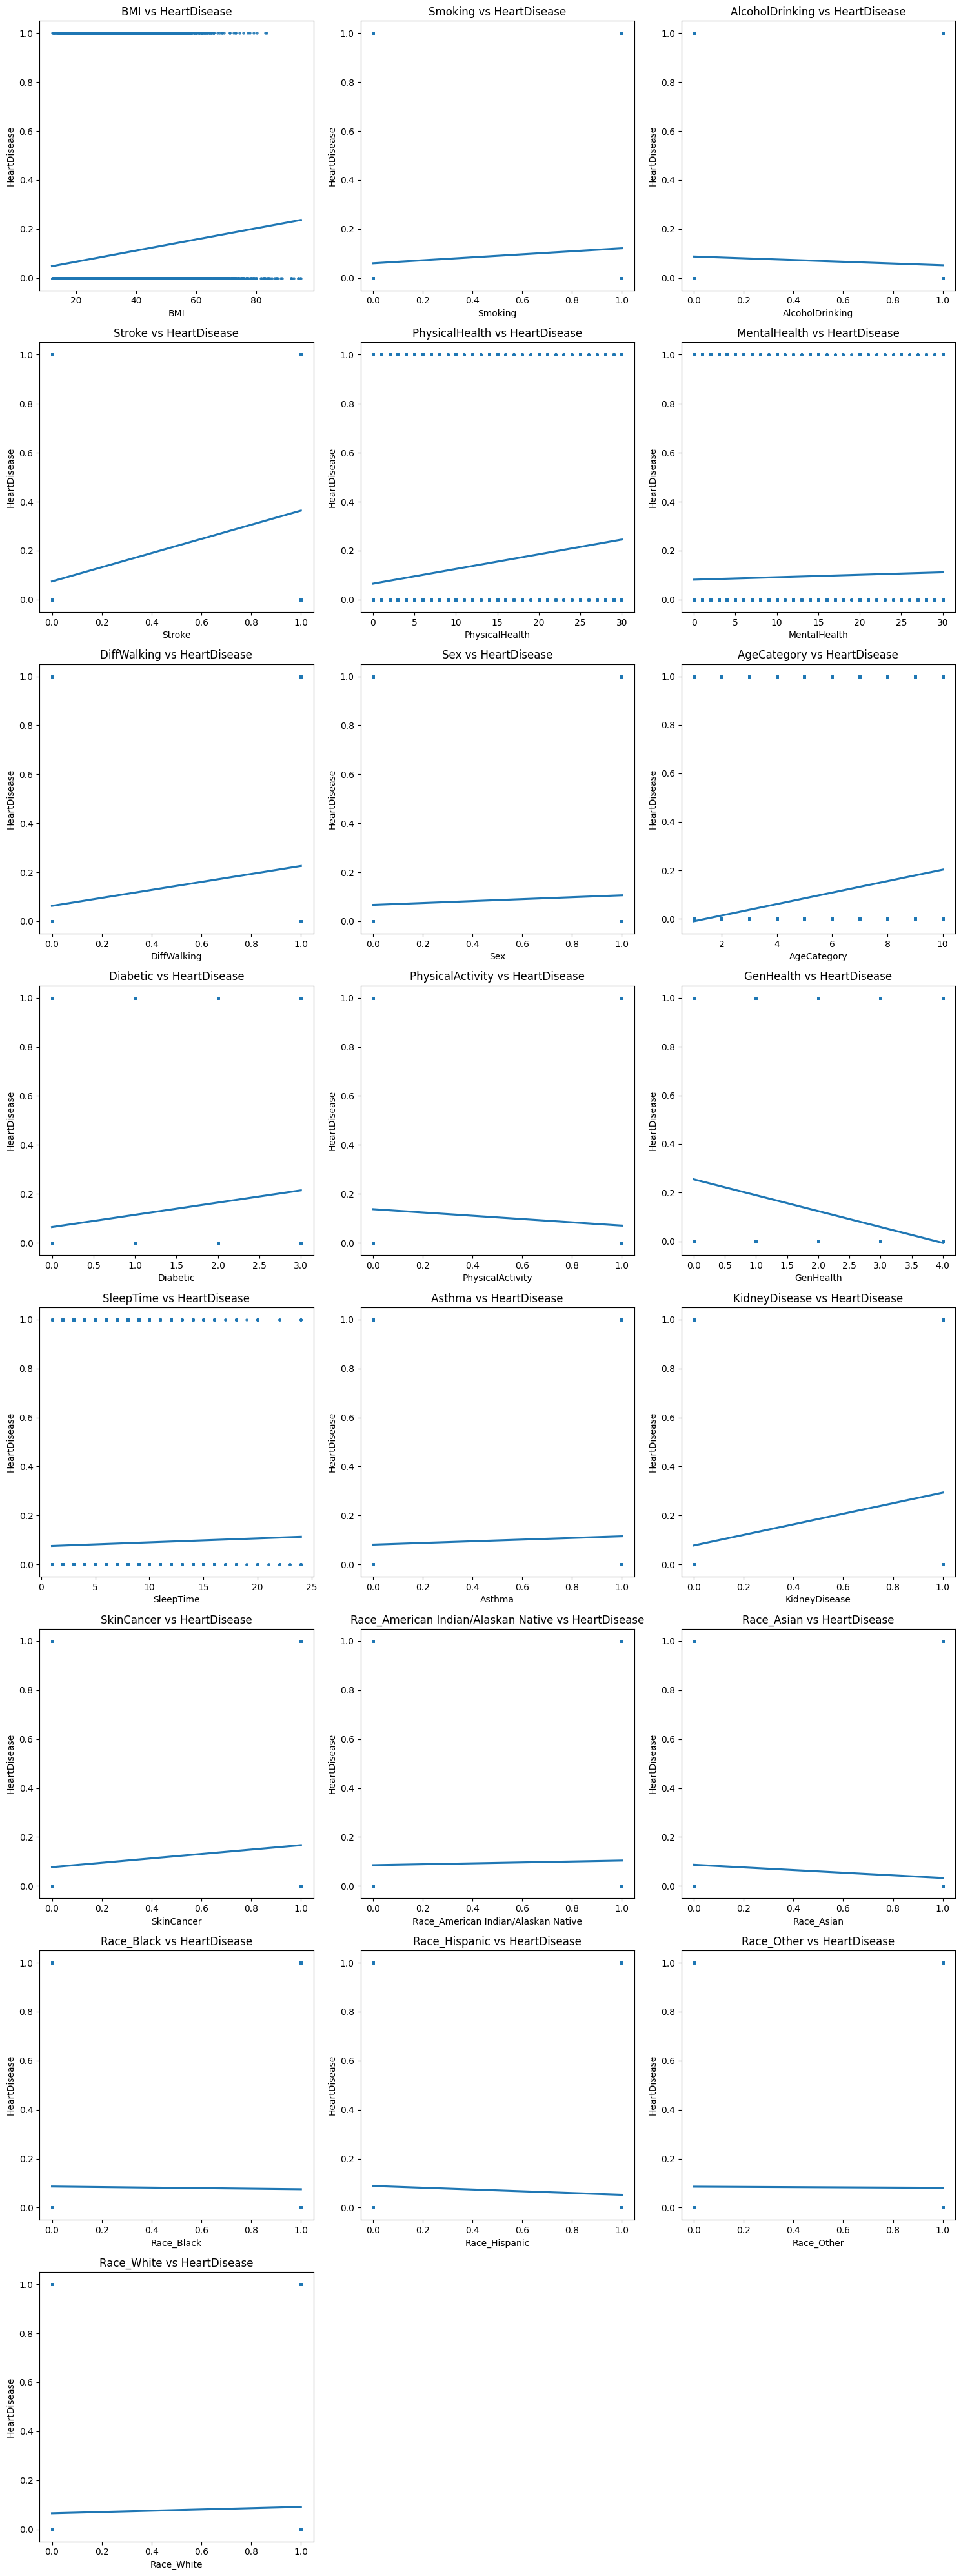

In [5]:
numerical_vars = data.select_dtypes(include='number').columns.drop("HadHeartAttack").to_list()
ncols = 3
nrows = -(-len(numerical_vars) // ncols)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
axes = axes.flatten()

for i, variable in enumerate(numerical_vars):
    ax = axes[i]
    sns.regplot(x=variable, y="HadHeartAttack", data=data, ax=ax, scatter_kws={'s':5}, ci = None)  # scatter_kws is to control point size
    ax.set_title(f'{variable} vs HadHeartAttack')
    ax.set_xlabel(variable)
    ax.set_ylabel('HadHeartAttack')

for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()